<a href="https://colab.research.google.com/github/biancu/Data-Science/blob/main/Networkx_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import csv
import os
import sys
import json
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.
import numpy as np
import matplotlib.pyplot as plt

#Reading the data

In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
#os.getcwd()


'/content'

In [10]:
#%cd /content/drive/MyDrive/Colab Notebooks

In [11]:
with open(os.getcwd()+'/quakers_nodelist.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    # Retrieve the data
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes] # Get a list of only the node names

with open('quakers_edgelist.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edges = [tuple(e) for e in edgereader][1:] # Retrieve the data

In [12]:
print(len(node_names))
print(len(edges))

119
174


#Graph Creation

In [13]:
G = nx.Graph()

In [14]:
G.add_nodes_from(node_names)
G.add_edges_from(edges)

In [15]:
print(G)

Graph with 119 nodes and 174 edges


In [16]:
# print number of nodes, number of edges, average degree, the graph content

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

degree_sequence = [d for n, d in G.degree()]
avg_degree = sum(degree_sequence) / len(degree_sequence)
print("Average degree:", avg_degree)

print("Graph content:")
print(G.nodes(data=True))
print(G.edges(data=True))

Number of nodes: 119
Number of edges: 174
Average degree: 2.9243697478991595
Graph content:
[('Joseph Wyeth', {}), ('Alexander Skene of Newtyle', {}), ('James Logan', {}), ('Dorcas Erbery', {}), ('Lilias Skene', {}), ('William Mucklow', {}), ('Thomas Salthouse', {}), ('William Dewsbury', {}), ('John Audland', {}), ('Richard Claridge', {}), ('William Bradford', {}), ('Fettiplace Bellers', {}), ('John Bellers', {}), ('Isabel Yeamans', {}), ('George Fox the younger', {}), ('George Fox', {}), ('John Stubbs', {}), ('Anne Camm', {}), ('John Camm', {}), ('Thomas Camm', {}), ('Katharine Evans', {}), ('Lydia Lancaster', {}), ('Samuel Clarridge', {}), ('Thomas Lower', {}), ('Gervase Benson', {}), ('Stephen Crisp', {}), ('James Claypoole', {}), ('Thomas Holme', {}), ('John Freame', {}), ('John Swinton', {}), ('William Mead', {}), ('Henry Pickworth', {}), ('John Crook', {}), ('Gilbert Latey', {}), ('Ellis Hookes', {}), ('Joseph Besse', {}), ('James Nayler', {}), ('Elizabeth Hooten', {}), ('George 

In [17]:
hist_sig_dict = {}
gender_dict = {}
birth_dict = {}
death_dict = {}
id_dict = {}

In [18]:
for node in nodes: # Loop through the list, one row at a time
    hist_sig_dict[node[0]] = node[1] # Access the correct item, add it to the corresponding dictionary
    gender_dict[node[0]] = node[2]
    birth_dict[node[0]] = node[3]
    death_dict[node[0]] = node[4]
    id_dict[node[0]] = node[5]

In [19]:
nx.set_node_attributes(G, hist_sig_dict, 'historical_significance')
nx.set_node_attributes(G, gender_dict, 'gender')
nx.set_node_attributes(G, birth_dict, 'birth_year')
nx.set_node_attributes(G, death_dict, 'death_year')
nx.set_node_attributes(G, id_dict, 'sdfb_id')

In [20]:
for n in G.nodes(): # Loop through every node, in our data "n" will be the name of the person
    print(n, G.nodes[n]['birth_year']) # Access every node by its name, and then by the attribute "birth_year"

Joseph Wyeth 1663
Alexander Skene of Newtyle 1621
James Logan 1674
Dorcas Erbery 1656
Lilias Skene 1626
William Mucklow 1630
Thomas Salthouse 1630
William Dewsbury 1621
John Audland 1630
Richard Claridge 1649
William Bradford 1663
Fettiplace Bellers 1687
John Bellers 1654
Isabel Yeamans 1637
George Fox the younger 1551
George Fox 1624
John Stubbs 1618
Anne Camm 1627
John Camm 1605
Thomas Camm 1640
Katharine Evans 1618
Lydia Lancaster 1683
Samuel Clarridge 1631
Thomas Lower 1633
Gervase Benson 1569
Stephen Crisp 1628
James Claypoole 1634
Thomas Holme 1626
John Freame 1665
John Swinton 1620
William Mead 1627
Henry Pickworth 1673
John Crook 1616
Gilbert Latey 1626
Ellis Hookes 1635
Joseph Besse 1683
James Nayler 1618
Elizabeth Hooten 1562
George Whitehead 1637
John Whitehead 1630
William Crouch 1628
Benjamin Furly 1636
Silvanus Bevan 1691
Robert Rich 1607
John Whiting 1656
Christopher Taylor 1614
Thomas Lawson 1630
Richard Farnworth 1630
William Coddington 1601
Thomas Taylor 1617
Richard 

In [21]:
density = nx.density(G)
print("Network density:", density)


Network density: 0.02478279447372169


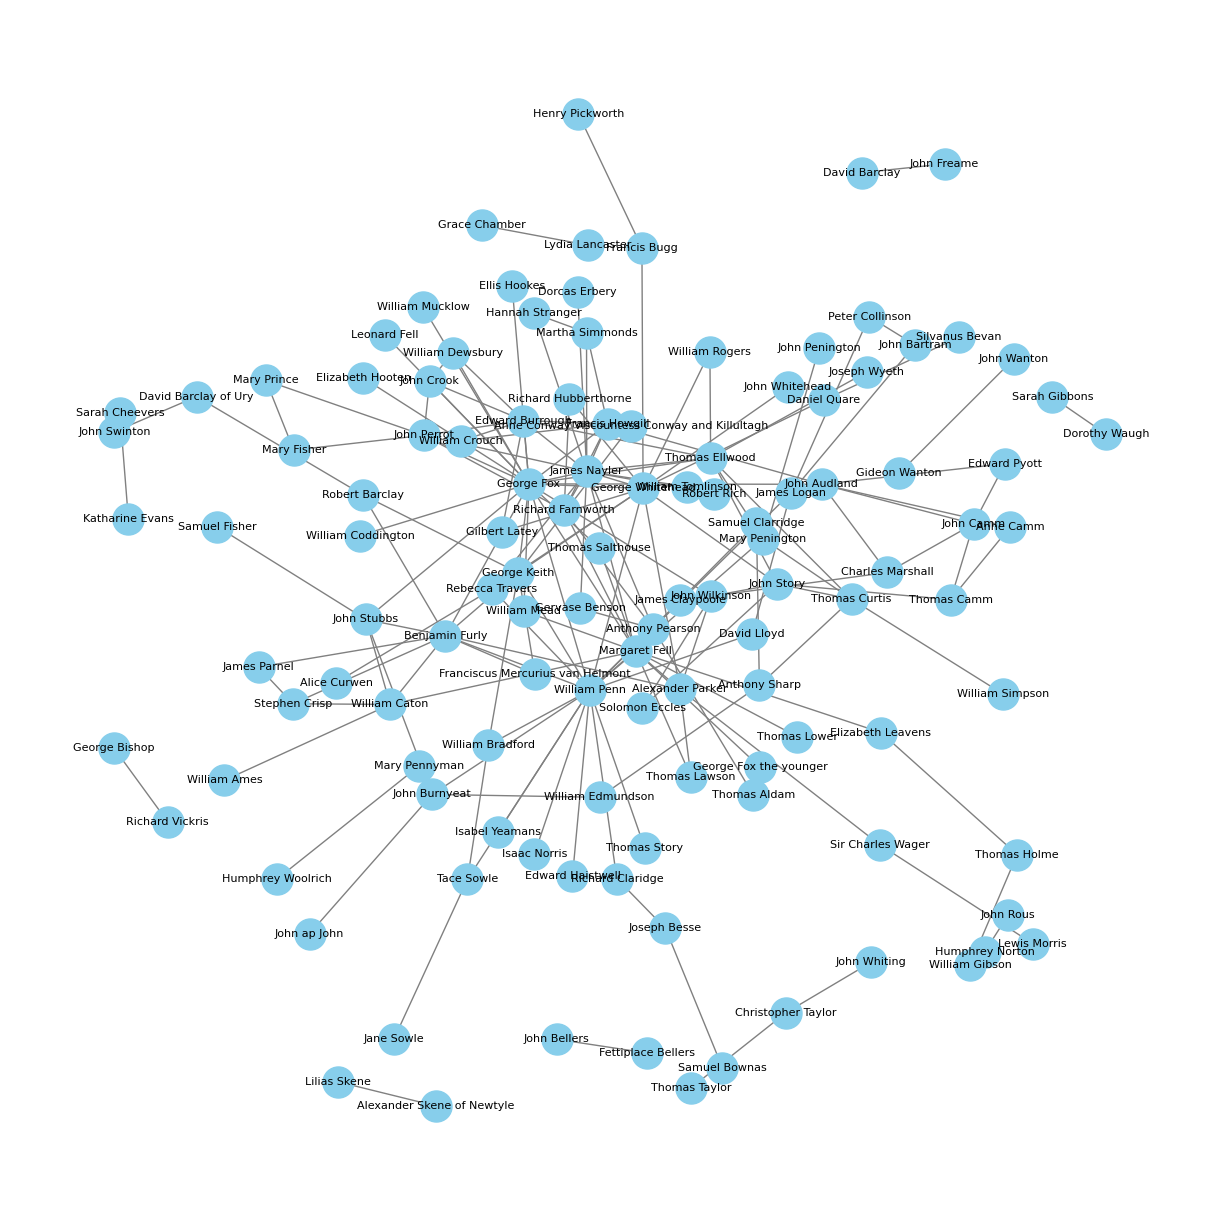

In [22]:
#plot the graph
plt.figure(figsize=(12, 12))  # Increase the figure size
pos = nx.spring_layout(G, k=0.3)  # Adjust the k parameter for node spacing
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray', font_size=8)  # Customize node/edge colors, sizes, and font size
plt.show()

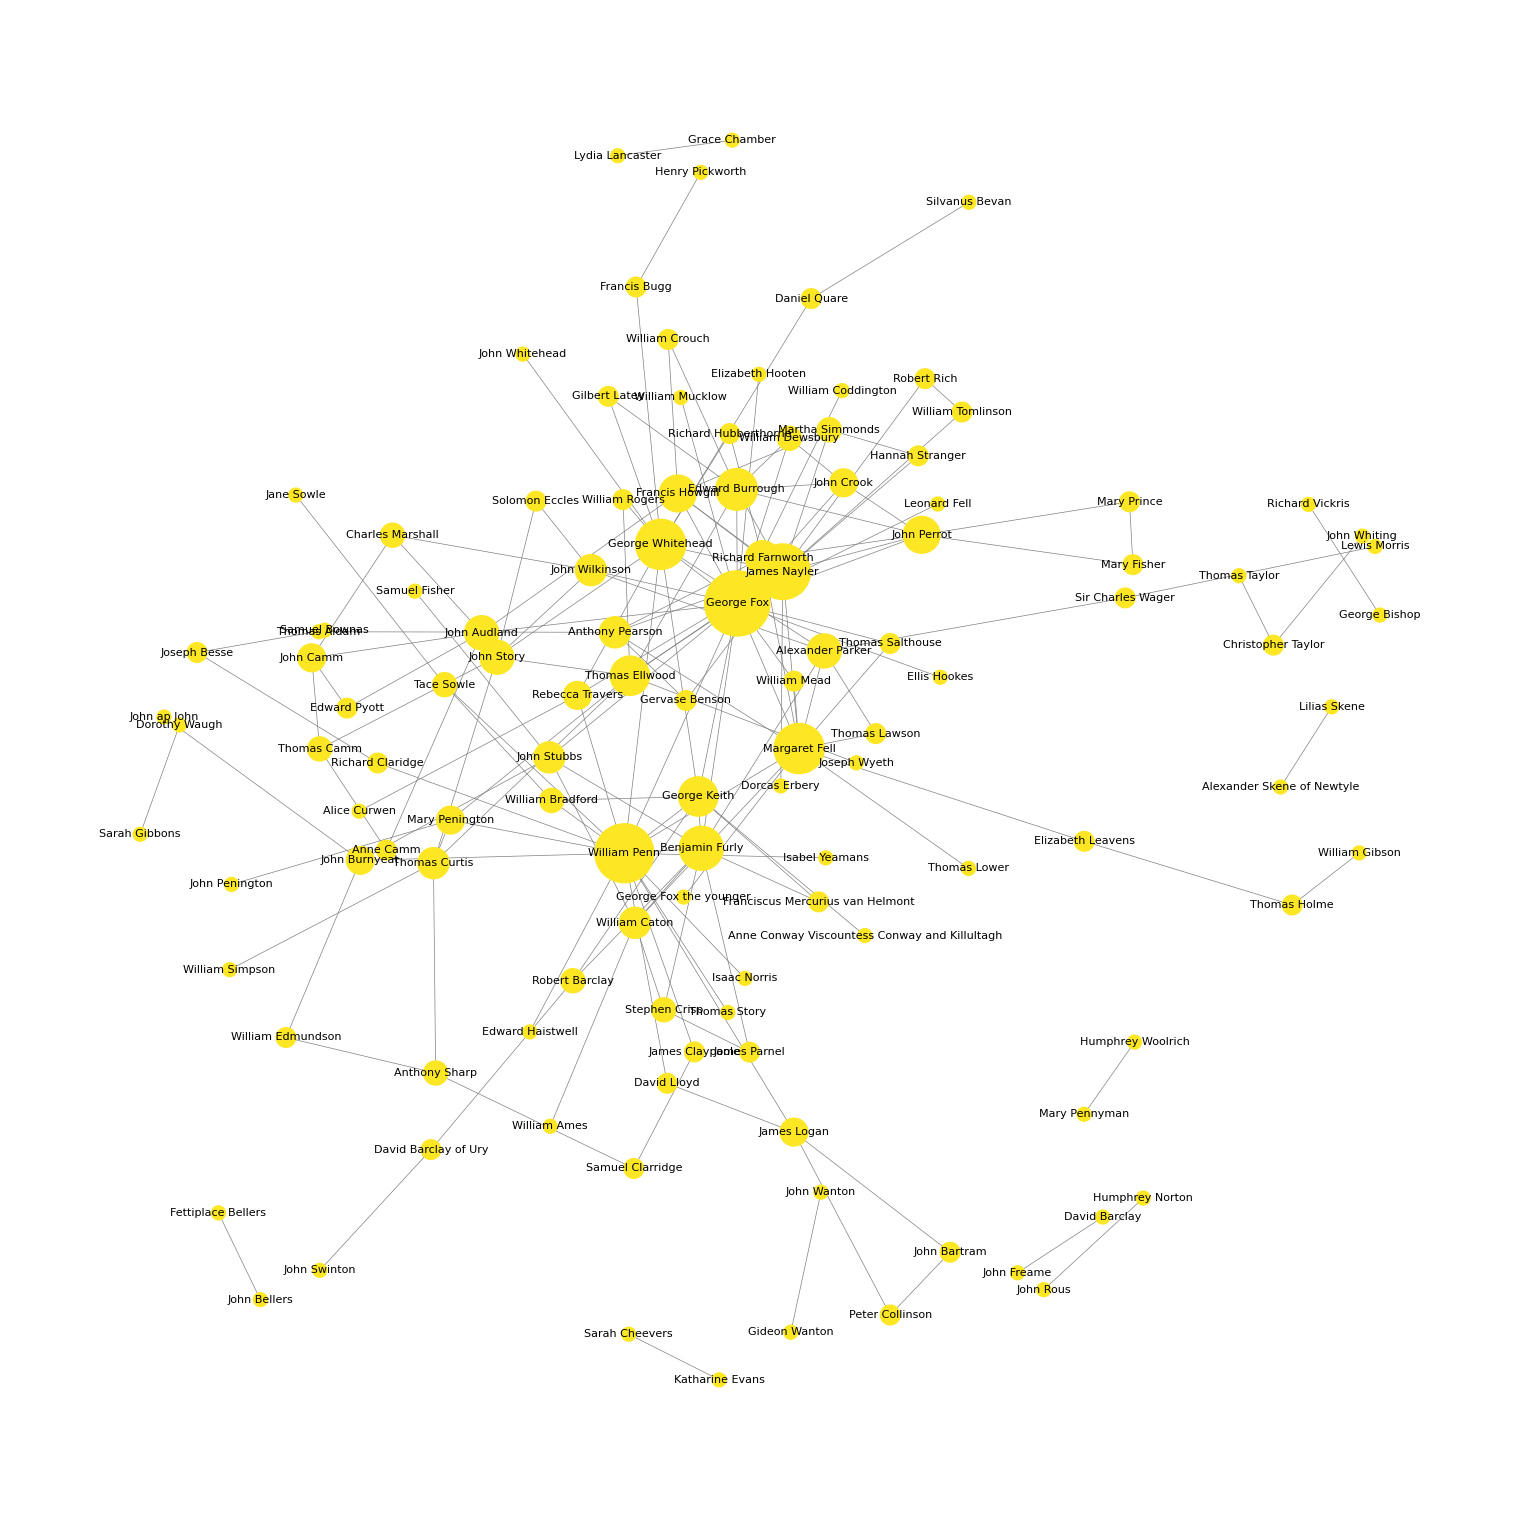

In [24]:
#make the above graph less crowded and plot based on node degree

plt.figure(figsize=(15, 15))  # Increase the figure size
pos = nx.spring_layout(G, k=0.3)  # Adjust the k parameter for node spacing

# Assign node sizes based on another node attribute (e.g., 'degree')
node_sizes = [G.degree(n) * 100 for n in G.nodes()]  # Reduced node size

# Assign edge widths based on an edge attribute (if available, otherwise use a default width)
edge_widths = [(d.get('weight', 1) * 0.5) for u, v, d in G.edges(data=True)] # Reduced edge width


nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, width=edge_widths, edge_color='gray', font_size=8, cmap=plt.cm.viridis_r)  # Customize node/edge colors, sizes, and font size
plt.show()

In [25]:
fell_whitehead_path = nx.shortest_path(G, source="Margaret Fell", target="George Whitehead")

print("Shortest path between Fell and Whitehead:", fell_whitehead_path)

Shortest path between Fell and Whitehead: ['Margaret Fell', 'George Fox', 'George Whitehead']


In [26]:
print("Length of that path:", len(fell_whitehead_path)-1)

Length of that path: 2


In [27]:
#print(nx.diameter(G))

In [29]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(G))

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G)
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

False
Network diameter of largest component: 8


In [30]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.16937799043062202


#Centrality

In [31]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

In [32]:
print(G.nodes['George Fox'])

{'historical_significance': ' a founder of the Religious Society of Friends (Quakers)', 'gender': 'male', 'birth_year': '1624', 'death_year': '1691', 'sdfb_id': '10004524', 'degree': 22}


In [33]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [34]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('George Fox', 22)
('William Penn', 18)
('James Nayler', 16)
('George Whitehead', 13)
('Margaret Fell', 13)
('Benjamin Furly', 10)
('Edward Burrough', 9)
('George Keith', 8)
('Thomas Ellwood', 8)
('Francis Howgill', 7)
('John Perrot', 7)
('John Audland', 6)
('Richard Farnworth', 6)
('Alexander Parker', 6)
('John Story', 6)
('John Stubbs', 5)
('Thomas Curtis', 5)
('John Wilkinson', 5)
('William Caton', 5)
('Anthony Pearson', 5)


In [35]:
#Run betweeness and eigen_vector centrality
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [36]:
#sort betweenness (or eigenvector) centrality
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('William Penn', 0.23999456006192205)
('George Fox', 0.23683257726065216)
('George Whitehead', 0.12632024847366005)
('Margaret Fell', 0.12106792237170329)
('James Nayler', 0.10446026280446098)
('Benjamin Furly', 0.06419626175167242)
('Thomas Ellwood', 0.046190623885104545)
('George Keith', 0.045006564009171565)
('John Audland', 0.04164936340077581)
('Alexander Parker', 0.03893676140525336)
('John Story', 0.028990098622866983)
('John Burnyeat', 0.028974117533439564)
('John Perrot', 0.02829566854990583)
('James Logan', 0.026944806605823553)
('Richard Claridge', 0.026944806605823553)
('Robert Barclay', 0.026944806605823553)
('Elizabeth Leavens', 0.026944806605823553)
('Thomas Curtis', 0.026729751729751724)
('John Stubbs', 0.024316593960227152)
('Mary Penington', 0.02420824624214454)


In [37]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: William Penn | Betweenness Centrality: 0.23999456006192205 | Degree: 18
Name: George Fox | Betweenness Centrality: 0.23683257726065216 | Degree: 22
Name: George Whitehead | Betweenness Centrality: 0.12632024847366005 | Degree: 13
Name: Margaret Fell | Betweenness Centrality: 0.12106792237170329 | Degree: 13
Name: James Nayler | Betweenness Centrality: 0.10446026280446098 | Degree: 16
Name: Benjamin Furly | Betweenness Centrality: 0.06419626175167242 | Degree: 10
Name: Thomas Ellwood | Betweenness Centrality: 0.046190623885104545 | Degree: 8
Name: George Keith | Betweenness Centrality: 0.045006564009171565 | Degree: 8
Name: John Audland | Betweenness Centrality: 0.04164936340077581 | Degree: 6
Name: Alexander Parker | Betweenness Centrality: 0.03893676140525336 | Degree: 6
Name: John Story | Betweenness Centrality: 0.028990098622866983 | Degree: 6
Name: John Burnyeat | Betweenness Centrality: 0.028974117533439564 | Degree: 4
Name: John Perrot | Betweenness Centrality: 0.0282956685

#Community detection and Modularity

In [39]:
communities = community.greedy_modularity_communities(G)

In [40]:
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G, modularity_dict, 'modularity')

In [41]:
# First get a list of just the nodes in that class
class0 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 0]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class0}

# Then sort that dictionary and print the first 5 results
class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by Eigenvector Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])

Modularity Class 0 Sorted by Eigenvector Centrality:
Name: James Nayler | Eigenvector Centrality: 0.3352974100447867
Name: Margaret Fell | Eigenvector Centrality: 0.253170949905681
Name: Francis Howgill | Eigenvector Centrality: 0.19095393782681047
Name: Richard Farnworth | Eigenvector Centrality: 0.15368535029296415
Name: Anthony Pearson | Eigenvector Centrality: 0.11120476725256785


In [42]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', list(c)) # Print out the classes and their members

Class 0: ['Gervase Benson', 'Richard Farnworth', 'George Fox the younger', 'Margaret Fell', 'William Tomlinson', 'Dorcas Erbery', 'Thomas Holme', 'Robert Rich', 'Elizabeth Leavens', 'Martha Simmonds', 'Hannah Stranger', 'Francis Howgill', 'Anthony Pearson', 'Thomas Aldam', 'James Nayler', 'William Gibson', 'Thomas Lower']
Class 1: ['Isaac Norris', 'Isabel Yeamans', 'Samuel Bownas', 'Jane Sowle', 'Peter Collinson', 'Joseph Besse', 'Edward Haistwell', 'Anne Conway Viscountess Conway and Killultagh', 'Tace Sowle', 'Thomas Story', 'George Keith', 'William Bradford', 'Richard Claridge', 'William Penn', 'John Bartram', 'David Lloyd', 'James Logan']
Class 2: ['John Crook', 'Thomas Salthouse', 'Mary Prince', 'Mary Fisher', 'William Dewsbury', 'John Perrot', 'George Fox', 'William Mucklow', 'Leonard Fell', 'Edward Burrough', 'William Mead', 'William Crouch', 'Elizabeth Hooten', 'William Coddington', 'Ellis Hookes']
Class 3: ['Thomas Lawson', 'Gilbert Latey', 'Alice Curwen', 'Alexander Parker', 

#Back to connected components

In [43]:
# this returns a list of set of nodes belonging to the
# different (weakly) connected components
components = list(nx.connected_components(G))

# sort the component according to their size
components = list(sorted(components, key=lambda x:len(x), reverse=True))

In [44]:
# make a list with the size of each component
comp_sizes = []
for comp in components:
    comp_sizes.append(len(comp))
    print(len(comp))

96
3
2
2
2
2
2
2
2
2
2
2


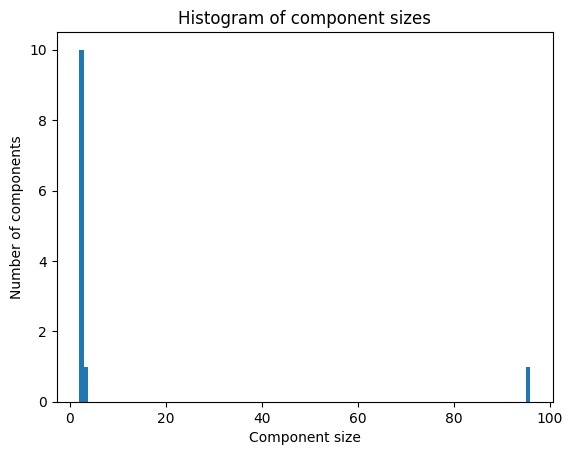

In [45]:
# plot the histogram of component sizes
hist = plt.hist(comp_sizes, bins=100)
plt.title('Histogram of component sizes')
plt.xlabel('Component size')
plt.ylabel('Number of components')
plt.show()

In [ ]:
# let's make a new graph which is the subgraph of G corresponding to
# the largest connected component
# let's find the largest component


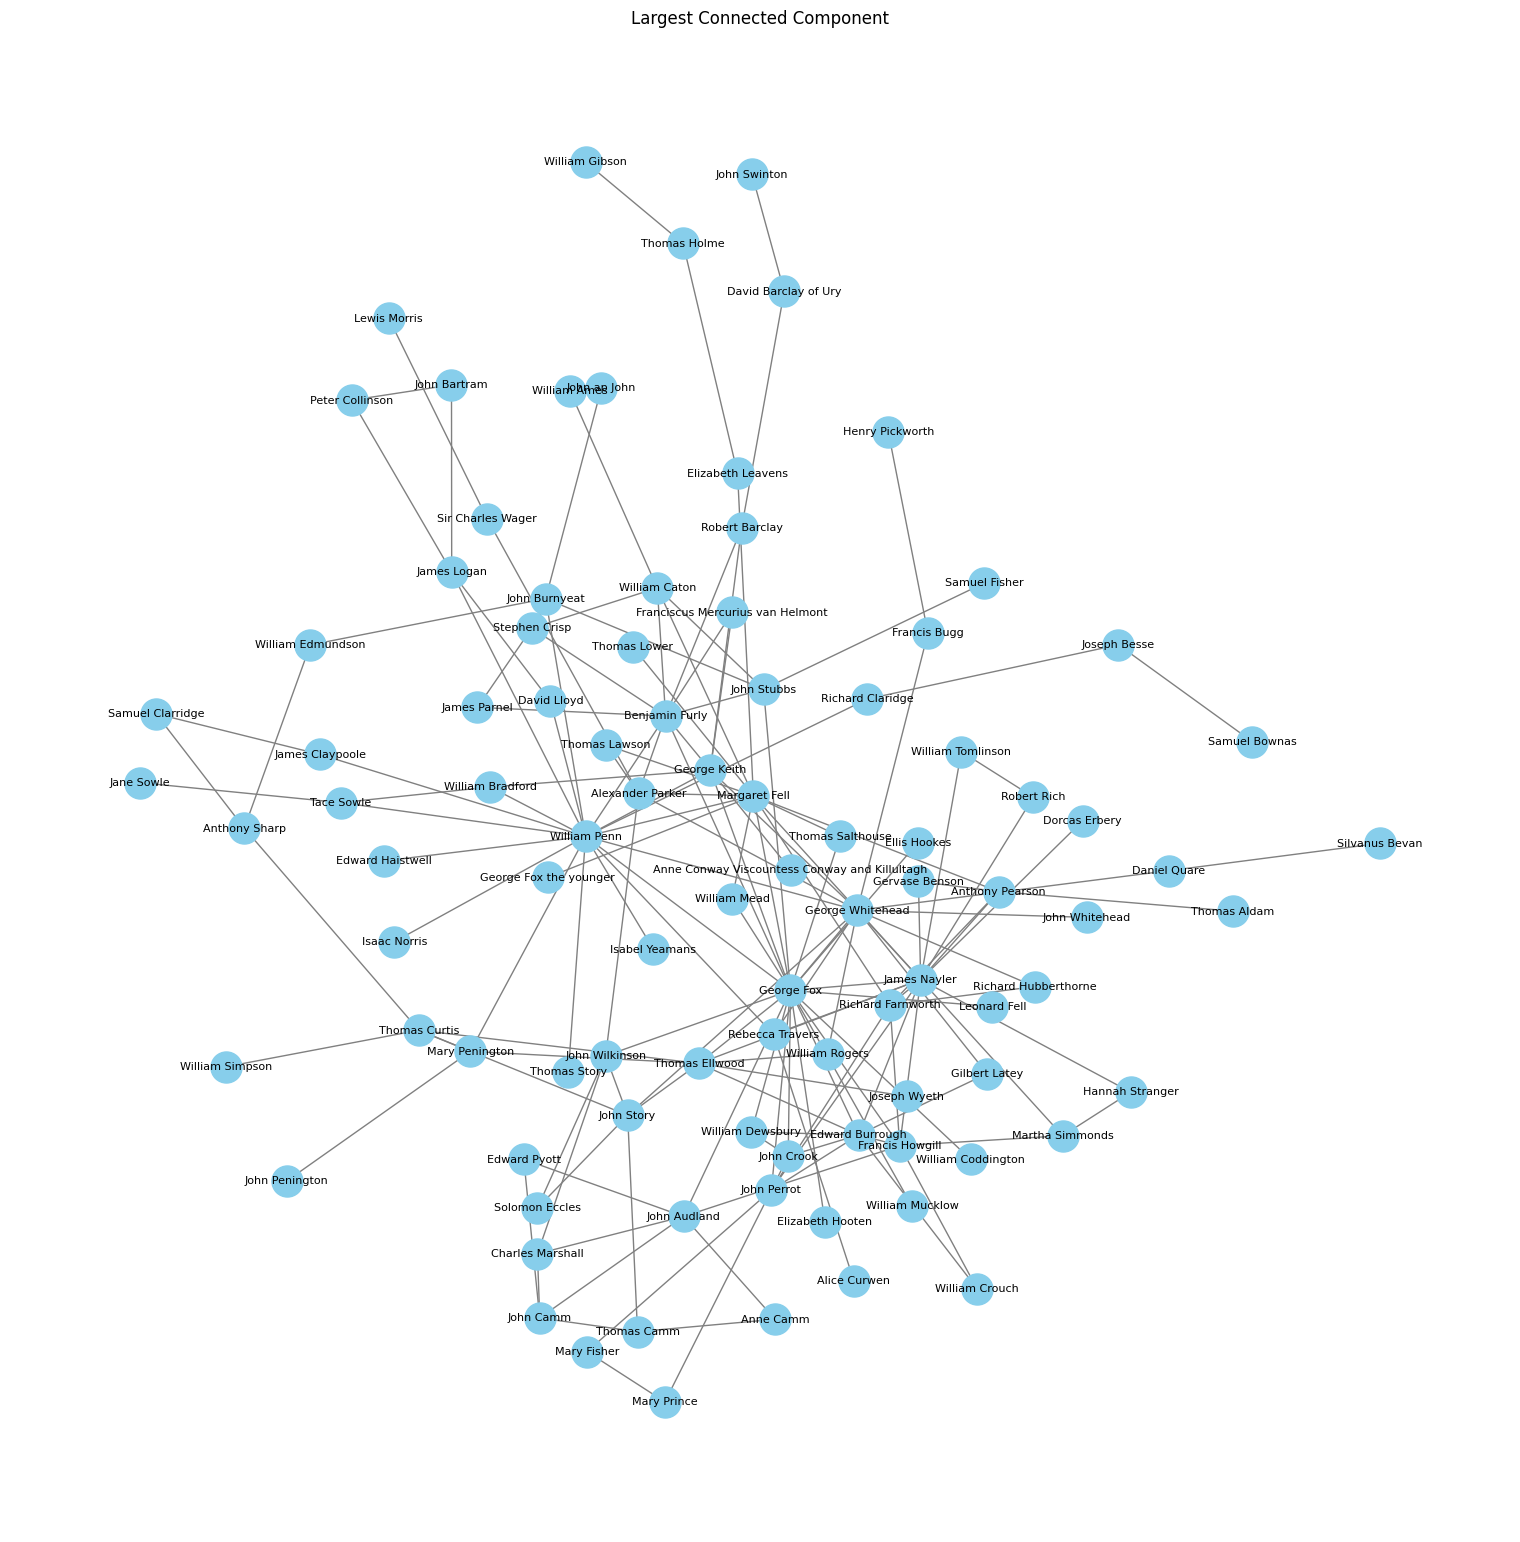

In [50]:
# create subgraph with largest connected component and visuzalize it

# Find the largest connected component
components = list(nx.connected_components(G))
largest_component = max(components, key=len)

# Create a subgraph of the largest connected component
lcc_graph = G.subgraph(largest_component)

# Visualize the subgraph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(lcc_graph, k=0.3)
nx.draw(lcc_graph, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray', font_size=8)
plt.title("Largest Connected Component")
plt.show()

In [48]:
nx.write_gexf(G, 'quaker_network.gexf')